# Class mapping exercise

#### Load python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

### Election map
#### What percentage of vote did Biden/Trump receive in California counties?

In [4]:
# Values: https://raw.githubusercontent.com/stiles/notebooks/master/elections/data/ca_counties_election_results_2020.csv
# Geo: https://raw.githubusercontent.com/stiles/usc/main/data/geo/counties_simple.geojson

#### Read election results

In [5]:
election_df = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/notebooks/master/elections/data/ca_counties_election_results_2020.csv",
    dtype={"county_fips": str},
)

In [6]:
election_df.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,winner
0,California,001,Alameda,136309,617659,769864,-481350,0.177056,0.802296,0.625240,Biden
1,California,003,Alpine,244,476,741,-232,0.329285,0.642375,0.313090,Biden
2,California,005,Amador,13585,8153,22302,5432,0.609138,0.365573,0.243566,Trump
3,California,007,Butte,48730,50426,102042,-1696,0.477548,0.494169,0.016621,Biden
4,California,009,Calaveras,16518,10046,27164,6472,0.608084,0.369828,0.238257,Trump


#### Read county boundaries

In [7]:
ca_counties_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/usc/main/data/geo/counties_simple.geojson",
    dtype={"county_fips": str},
)

In [8]:
ca_counties_gdf.head()

,county_name,county_fips,geometry
0,Alameda,001,"POLYGON ((-122.27125 37.90503, -122.27024 37.9..."
1,Alpine,003,"POLYGON ((-119.58667 38.71420, -119.58653 38.7..."
2,Amador,005,"POLYGON ((-120.07246 38.70276, -120.07249 38.6..."
3,Butte,007,"POLYGON ((-121.07661 39.59729, -121.07945 39.5..."
4,Calaveras,009,"POLYGON ((-120.01792 38.43586, -120.01788 38.4..."


#### Merge the two 

In [9]:
ca_counties_prez20 = pd.merge(
    ca_counties_gdf, election_df, on=["county_fips", "county_name"]
)

In [10]:
ca_counties_prez20.to_file(
    "../data/geo/president_county_results_2020.geojson", driver="GeoJSON"
)

---

### Vehicle map
##### What's the Tesla ownership rate by LA ZIP Codes?

In [11]:
# Values: https://raw.githubusercontent.com/stiles/notebooks/master/california-fuel-vehicles/output/tesla_zips_slim.csv
# Geo: https://raw.githubusercontent.com/stiles/notebooks/master/zips/data/processed/ca_zips_simple.geojson.json

#### Read Tesla data

In [12]:
tesla_df = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/notebooks/master/california-fuel-vehicles/output/tesla_zips_slim.csv",
    dtype={"zip": str},
)

In [13]:
tesla_df.head()

,zip,name,teslas,all_vehicles,tesla_rate_1k,avg_house_income,avg_net_worth
0,90004,Los Angeles,200,22734,8.80,65893,232653
1,90005,Los Angeles,58,12518,4.63,53191,105569
2,90006,Los Angeles,26,17324,1.50,42242,39289
3,90007,Los Angeles,27,10707,2.52,38564,39966
4,90008,Los Angeles,54,12611,4.28,56286,284531


#### Read ZIP Codes geo file

In [14]:
zips_la_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/notebooks/master/zips/data/processed/ca_zips.geojson"
)

In [15]:
zips_la_gdf.head()

#### Get rid of Catalina and San Clemente islands

In [31]:
exclude = ["90704", "90274"]

In [32]:
no_islands = zips_la_gdf[~zips_la_gdf["id"].isin(exclude)]

<AxesSubplot:>

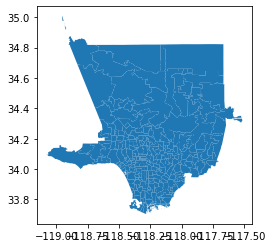

In [33]:
no_islands.plot()

In [34]:
no_islands.to_file("../data/geo/la_county_zips.geojson", driver="GeoJSON")

#### Merge the two

In [35]:
tesla_zips_gdf = pd.merge(
    no_islands, tesla_df, left_on="id", right_on="zip", how="left"
).fillna(0)

#### Export merged geo file

In [36]:
tesla_zips_gdf.to_file(
    "../data/geo/la_county_zips_tesla_rate.geojson", driver="GeoJSON"
)

---

### Population map
##### How's the white population distributed in LA by neighborhood? 

In [37]:
# Values:https://raw.githubusercontent.com/stiles/usc/main/data/processed/la_neighborhood_demographics.csv
# Geo: https://raw.githubusercontent.com/stiles/usc/main/data/geo/la-neighborhoods.geojson

#### Read race/ethnicity data

In [69]:
whites_la_df = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/usc/main/data/processed/la_neighborhood_demographics.csv"
)

In [70]:
whites_la_df.head()

,name,total_population,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,asians_all,other_all,white_percent,black_percent,american_indian_percent,asian_percent,native_hawaiian_percent,other_percent,two_or_more_races_percent,latino_percent,asians_all_percent,other_all_percent,nonwhite_percent,majority_nonwhite,majority_white,majority_black,majority_american_indian_and_alaska_native,majority_asian,majority_native_hawaiian,majority_other,majority_two_or_more_races,majority_latino,median_householdincome,total_occupied_housing_units,owner_occupied,renter_occupied,owner_percent,renter_percent,majority_owner,majority_renter,majorityhigherthanmedianincomeLA
0,Acton,13533.0,3029.552482,43.082892,9.114016,122.284944,0.280278,0.168167,64.192933,1018.768948,122.565222,73.475116,223900.0,3200.0,700.0,9000.0,0.0,0.0,4700.0,75300.0,9100.0,5400.0,776100.0,True,False,False,False,False,False,False,False,False,99453.506605,1474.265218,1329.164851,145.100367,0.901578,0.098422,True,False,True
1,Adams-Normandie,37987.0,1455.331389,3600.780013,5.886652,1621.694883,61.673873,32.257990,272.512175,11751.163222,1683.368756,310.656818,38300.0,94800.0,200.0,42700.0,1600.0,800.0,7200.0,309300.0,44300.0,8200.0,961700.0,True,False,False,False,False,False,False,False,False,37419.270130,5437.575802,1123.870291,4313.705512,0.206686,0.793314,False,True,False
2,Agoura Hills,27220.0,9336.980458,414.665537,0.000000,1054.881212,0.000000,32.058492,418.461988,1547.696671,1054.881212,450.520480,343000.0,15200.0,0.0,38800.0,0.0,1200.0,15400.0,56900.0,38800.0,16600.0,657000.0,True,False,False,False,False,False,False,False,False,121211.788628,4675.116219,3311.101230,1364.014989,0.708239,0.291761,True,False,True
3,Agua Dulce,17982.0,3430.950690,84.117674,29.477971,176.259175,2.276182,4.267842,130.656334,1025.422432,178.535357,164.402147,190800.0,4700.0,1600.0,9800.0,100.0,200.0,7300.0,57000.0,9900.0,9100.0,809200.0,True,False,False,False,False,False,False,False,False,108312.326136,1490.569409,1408.056410,82.512999,0.944643,0.055357,True,False,True
4,Alhambra,105896.0,3511.362136,809.817692,108.877418,19403.221726,191.097366,149.398101,773.197164,15428.325788,19594.319091,1031.472682,33200.0,7600.0,1000.0,183200.0,1800.0,1400.0,7300.0,145700.0,185000.0,9700.0,966800.0,True,False,False,False,False,False,False,False,False,61884.537960,13840.151455,5937.368580,7902.782874,0.428996,0.571004,False,True,False


In [53]:
# whites_la_df[
#     [
#         "white_percent",
#         "black_percent",
#         "american_indian_percent",
#         "asian_percent",
#         "native_hawaiian_percent",
#         "other_percent",
#         "two_or_more_races_percent",
#         "latino_percent",
#         "asians_all_percent",
#         "other_all_percent",
#         "nonwhite_percent",
#     ]
# ] = (
#     whites_la_df[
#         [
#             "white_percent",
#             "black_percent",
#             "american_indian_percent",
#             "asian_percent",
#             "native_hawaiian_percent",
#             "other_percent",
#             "two_or_more_races_percent",
#             "latino_percent",
#             "asians_all_percent",
#             "other_all_percent",
#             "nonwhite_percent",
#         ]
#     ]
#     * 100
# ).round(
#     2
# )

In [55]:
# whites_la_df.to_csv("../data/processed/la_neighborhood_demographics.csv", index=False)

#### Read LA neighborhoods geo file

In [46]:
la_hoods_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/usc/main/data/geo/la-neighborhoods.geojson"
)

In [49]:
la_hoods_gdf.head()

,name,slug,county,type,city,region,geometry
0,Vermont Square,vermont-square,los-angeles,Los Angeles,los-angeles,south-la,"POLYGON ((-118.28273 34.01114, -118.28207 34.0..."
1,Arlington Heights,arlington-heights,los-angeles,Los Angeles,los-angeles,central-la,"POLYGON ((-118.31672 34.05250, -118.31649 34.0..."
2,Bel-Air,bel-air,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.46076 34.13033, -118.46068 34.1..."
3,Beverly Crest,beverly-crest,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.45139 34.13176, -118.45116 34.1..."
4,Beverlywood,beverlywood,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.39426 34.05244, -118.39317 34.0..."


#### Merge the two

In [50]:
la_hoods_race_gdf = pd.merge(la_hoods_gdf, whites_la_df, on="name")

In [51]:
la_hoods_race_gdf

,name,slug,county,type,city,region,geometry,total_population,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,asians_all,other_all,white_percent,black_percent,american_indian_percent,asian_percent,native_hawaiian_percent,other_percent,two_or_more_races_percent,latino_percent,asians_all_percent,other_all_percent,nonwhite_percent,majority_nonwhite,majority_white,majority_black,majority_american_indian_and_alaska_native,majority_asian,majority_native_hawaiian,majority_other,majority_two_or_more_races,majority_latino,median_householdincome,total_occupied_housing_units,owner_occupied,renter_occupied,owner_percent,renter_percent,majority_owner,majority_renter,majorityhigherthanmedianincomeLA
0,Vermont Square,vermont-square,los-angeles,Los Angeles,los-angeles,south-la,"POLYGON ((-118.28273 34.01114, -118.28207 34.0...",71469.0,983.023467,13503.105083,55.902474,724.002331,0.000000,393.233170,404.829453,37245.682133,724.002331,853.965097,1.375454,18.893653,0.078219,1.013030,0.000000e+00,0.550215,0.566441,52.114458,1.013030,1.194875,98.624546,True,False,False,False,False,False,False,False,True,41822.928950,14214.295664,4898.366783,9315.928882,0.344608,0.655392,False,True,False
1,Arlington Heights,arlington-heights,los-angeles,Los Angeles,los-angeles,central-la,"POLYGON ((-118.31672 34.05250, -118.31649 34.0...",44180.0,1196.494911,3185.189957,31.125602,4508.551244,49.408284,12.180941,323.267432,12013.558699,4557.959527,366.573974,2.708228,7.209574,0.070452,10.204960,1.118341e-01,0.027571,0.731705,27.192301,10.316794,0.829728,97.291772,True,False,False,False,False,False,False,False,False,42578.039781,7102.413584,1356.310928,5746.102656,0.190965,0.809035,False,True,False
2,Bel-Air,bel-air,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.46076 34.13033, -118.46068 34.1...",36105.0,5236.696004,206.303619,0.132539,673.387316,0.149772,0.187506,464.385694,285.427796,673.537089,464.705739,14.504074,0.571399,0.000367,1.865081,4.148238e-04,0.000519,1.286209,0.790549,1.865495,1.287095,85.495926,True,False,False,False,False,False,False,False,False,200418.552607,2768.149731,2284.649012,483.500719,0.825334,0.174666,True,False,True
3,Beverly Crest,beverly-crest,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.45139 34.13176, -118.45116 34.1...",33052.0,5575.862964,126.402255,0.026123,331.537402,0.000000,0.039668,127.941538,246.849875,331.537402,128.007329,16.869971,0.382435,0.000079,1.003078,0.000000e+00,0.000120,0.387092,0.746853,1.003078,0.387291,83.130029,True,False,False,False,False,False,False,False,False,181637.747622,2647.946141,2414.251796,233.694345,0.911745,0.088255,True,False,True
4,Beverlywood,beverlywood,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.39426 34.05244, -118.39317 34.0...",29704.0,5526.500729,128.003029,0.000000,489.848538,0.402517,7.904090,156.039551,462.484081,490.251054,163.943641,18.605241,0.430929,0.000000,1.649100,1.355092e-03,0.026610,0.525315,1.556976,1.650455,0.551924,81.394759,True,False,False,False,False,False,False,False,False,131530.784216,2590.068534,1625.398241,964.670293,0.627550,0.372450,True,False,True
5,Brentwood,brentwood,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.49013 34.13095, -118.49005 34.1...",47232.0,27083.486684,517.109245,62.914468,2674.639323,0.330770,81.933925,1174.941832,2017.416737,2674.970093,1319.790225,57.341393,1.094828,0.133203,5.662770,7.003089e-04,0.173471,2.487597,4.271292,5.663470,2.794271,42.658607,False,True,False,False,False,False,False,False,False,126920.693926,15383.417911,7618.019174,7765.398738,0.495210,0.504790,False,True,True
6,Carthay,carthay,los-angeles,Los Angeles,los-angeles,central-la,"POLYGON ((-118.36664 34.05168, -118.36664 34.0...",21995.0,3028.073843,397.857420,7.440793,517.266552,22.623810,0.003981,301.859598,880.001317,539.890362,309.304372,13.767101,1.808854,0.033829,2.351746,1.028589e-01,0.000018,1.372401,4.

#### Export merged geo file

In [43]:
la_hoods_race_gdf.to_file("../data/geo/la_neighborhoods_race.geojson", driver="GeoJSON")